# COSC 411: Artificial Intelligence

Instructor: Dr. Shuangquan (Peter) Wang

Email: spwang@salisbury.edu

Department of Computer Science, Salisbury University


# Module 3_ML algorithms and application

## 4. Logistic Regression


**Note: The contents of this note are mainly from "Machine learning basics" repository, https://github.com/zotroneneis/machine_learning_basics/blob/master/logistic_regression.ipynb**

**<font color=red>All rights reserved. Dissemination or sale of any part of this note is NOT permitted.</font>**

In logistic regression, we are trying to model the outcome of a **binary variable** given a **linear combination of input features**. For example, we could try to predict the outcome of an election (win/lose) using information about how much money a candidate spent campaigning, how much time she/he spent campaigning, etc.

### Model 

Logistic regression works as follows.

**Given:** 
- dataset $\{(\boldsymbol{x}^{(1)}, y^{(1)}), ..., (\boldsymbol{x}^{(m)}, y^{(m)})\}$
- with $\boldsymbol{x}^{(i)}$ being a $d-$dimensional vector $\boldsymbol{x}^{(i)} = (x^{(i)}_1, ..., x^{(i)}_d)$
- $y^{(i)}$ being a binary target variable, $y^{(i)} \in \{0,1\}$

The logistic regression model can be interpreted as a very **simple neural network:**
- it has a real-valued weight vector $\boldsymbol{w}= (w^{(1)}, ..., w^{(d)})$
- it has a real-valued bias $b$
- it uses a sigmoid function as its activation function

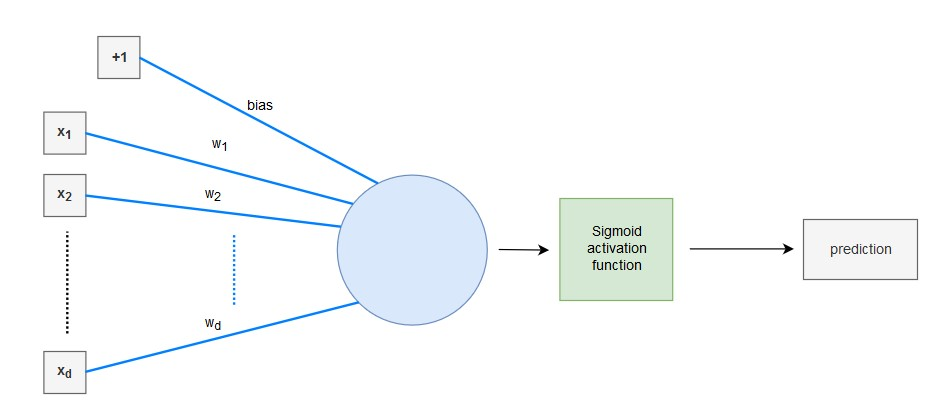

### Training

Different to linear regression, logistic regression has no closed form solution. But the cost function is convex, so we can train the model using gradient descent. In fact, **gradient descent** (or any other optimization algorithm) is guaranteed to find the global minimum (if the learning rate is small enough and enough training iterations are used).  

Training a logistic regression model has different steps. In the beginning (step 0) the parameters are initialized. The other steps are repeated for a specified number of training iterations or until convergence of the parameters.

* * * 
**Step 0:** Initialize the weight vector and bias with zeros (or small random values).
* * *

**Step 1:** Compute a linear combination of the input features and weights. This can be done in one step for all training examples, using vectorization and broadcasting:
$\boldsymbol{a} = \boldsymbol{X} \cdot \boldsymbol{w} + b $

where $\boldsymbol{X}$ is a matrix of shape $(n_{samples}, n_{features})$ that holds all training examples, and $\cdot$ denotes the dot product.
* * *

**Step 2:** Apply the sigmoid activation function, which returns values between 0 and 1:

$\boldsymbol{\hat{y}} = \sigma(\boldsymbol{a}) = \frac{1}{1 + \exp(-\boldsymbol{a})}$
* * *

**Step 3:** Compute the cost over the whole training set. We want to model the probability of the target values being 0 or 1. So during training we want to adapt our parameters such that our model outputs high values for examples with a positive label (true label being 1) and small values for examples with a negative label (true label being 0). This is reflected in the cost function:

$J(\boldsymbol{w},b) = - \frac{1}{m} \sum_{i=1}^m \Big[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \Big]$
* * *

**Step 4:** Compute the gradient of the cost function with respect to the weight vector and bias. A detailed explanation of this derivation can be found [here](https://stats.stackexchange.com/questions/278771/how-is-the-cost-function-from-logistic-regression-derivated).

The general formula is given by:

$ \frac{\partial J}{\partial w_j} = \frac{1}{m}\sum_{i=1}^m\left[\hat{y}^{(i)}-y^{(i)}\right]\,x_j^{(i)}$

For the bias, the inputs $x_j^{(i)}$ will be given 1.
* * *

**Step 5:** Update the weights and bias

$\boldsymbol{w} = \boldsymbol{w} - \eta \, \nabla_w J$  

$b = b - \eta \, \nabla_b J$

where $\eta$ is the learning rate.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
np.random.seed(123)

%matplotlib inline

## Dataset

In [ ]:
# We will perform logistic regression using a simple toy dataset of two classes
X, y_true = make_blobs(n_samples= 1000, centers=2)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y_true)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [ ]:
# Reshape targets to get column vector with shape (n_samples, 1)
y_true = y_true[:, np.newaxis]
# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y_true)

print(f'Shape X_train: {X_train.shape}')
print(f'Shape y_train: {y_train.shape}')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_test: {y_test.shape}')

## Logistic regression class

In [ ]:
class LogisticRegression:
    
    def __init__(self):
        pass

    def sigmoid(self, a):
        return 1 / (1 + np.exp(-a))

    def train(self, X, y_true, n_iters, learning_rate):
        """
        Trains the logistic regression model on given data X and targets y
        """
        # Step 0: Initialize the parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros((n_features, 1))
        self.bias = 0
        costs = []
        
        for i in range(n_iters):
            # Step 1 and 2: Compute a linear combination of the input features and weights, 
            # apply the sigmoid activation function
            y_predict = self.sigmoid(np.dot(X, self.weights) + self.bias)
            
            # Step 3: Compute the cost over the whole training set.
            cost = (- 1 / n_samples) * np.sum(y_true * np.log(y_predict) + (1 - y_true) * (np.log(1 - y_predict)))

            # Step 4: Compute the gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predict - y_true))
            db = (1 / n_samples) * np.sum(y_predict - y_true)

            # Step 5: Update the parameters
            self.weights = self.weights - learning_rate * dw
            self.bias = self.bias - learning_rate * db

            costs.append(cost)
            if i % 100 == 0:
                print(f"Cost after iteration {i}: {cost}")

        return self.weights, self.bias, costs

    def predict(self, X):
        """
        Predicts binary labels for a set of examples X.
        """
        y_predict = self.sigmoid(np.dot(X, self.weights) + self.bias)
        y_predict_labels = [1 if elem > 0.5 else 0 for elem in y_predict]

        return np.array(y_predict_labels)[:, np.newaxis]

## Initializing and training the model

In [ ]:
regressor = LogisticRegression()
w_trained, b_trained, costs = regressor.train(X_train, y_train, n_iters=600, learning_rate=0.009)

fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(600), costs)
plt.title("Development of cost over training")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

## Testing the model

In [ ]:
y_p_train = regressor.predict(X_train)
y_p_test = regressor.predict(X_test)

print(f"train accuracy: {100 - np.mean(np.abs(y_p_train - y_train)) * 100}%")
print(f"test accuracy: {100 - np.mean(np.abs(y_p_test - y_test))}%")

### Logistic Regression model in Sklearn

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html